In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

table = pd.read_csv("data\\clientes.csv")
display(table)

,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.47,alto_gasto_pagamento_baixos,312.49,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.47,baixo_gasto_pagamento_alto,284.63,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.47,baixo_gasto_pagamento_medio,331.21,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.47,baixo_gasto_pagamento_baixo,223.45,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.47,alto_gasto_pagamento_medio,341.49,Good,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.03,alto_gasto_pagamento_alto,479.87,Poor,1,0,0,0,1
99996,37932,5,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.03,alto_gasto_pagamento_medio,496.65,Poor,1,0,0,0,1
99997,37932,6,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.03,alto_gasto_pagamento_alto,516.81,Poor,1,0,0,0,1
99998,37932,7,25.0,mecanico,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.03,baixo_gasto_pagamento_alto,319.16,Standard,1,0,0,0,1


In [145]:
# verificando se há valores nulos:

table.isnull().sum()

id_cliente                  0
mes                         0
idade                       0
profissao                   0
salario_anual               0
num_contas                  0
num_cartoes                 0
juros_emprestimo            0
num_emprestimos             0
dias_atraso                 0
num_pagamentos_atrasados    0
num_verificacoes_credito    0
mix_credito                 0
divida_total                0
taxa_uso_credito            0
idade_historico_credito     0
investimento_mensal         0
comportamento_pagamento     0
saldo_final_mes             0
score_credito               0
emprestimo_carro            0
emprestimo_casa             0
emprestimo_pessoal          0
emprestimo_credito          0
emprestimo_estudantil       0
dtype: int64

In [146]:
# verificar se temos valores vazios na tabela
print(table.info())
print(table.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  object 
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  object 
 13  divida_total              100000 non-null  fl

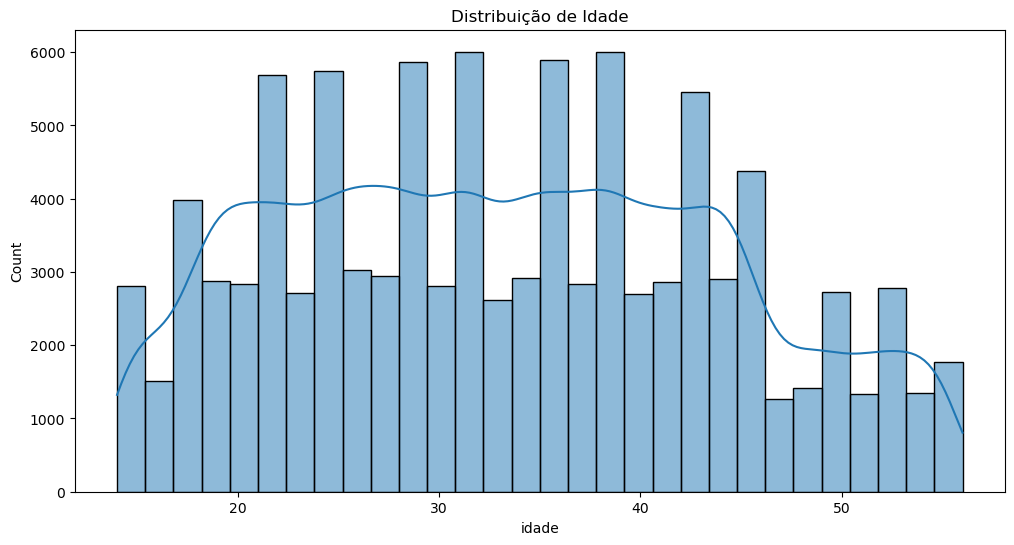

In [147]:
# Ve a distribuição de idade
plt.figure(figsize=(12, 6))
sns.histplot(table['idade'], bins = 30, kde=True)
plt.title('Distribuição de Idade')
plt.show()

In [148]:
table.describe()

,id_cliente,mes,idade,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,...,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,...,100000.00,100000.00,100000.00,100000.00,1.00e+05,100000.00,100000.00,100000.00,100000.00,100000.00
mean,25982.67,4.50,33.32,50505.12,5.37,5.53,14.53,3.53,21.08,13.31,...,1426.22,32.29,221.22,55.10,3.93e+02,0.31,0.51,0.31,0.32,0.31
std,14340.54,2.29,10.76,38299.42,2.59,2.07,8.74,2.45,14.80,6.24,...,1155.13,5.12,99.68,39.01,2.02e+02,0.46,0.50,0.46,0.47,0.46
min,1006.00,1.00,14.00,7005.93,0.00,0.00,1.00,0.00,0.00,0.00,...,0.23,20.00,1.00,0.00,7.76e-03,0.00,0.00,0.00,0.00,0.00
25%,13664.50,2.75,24.00,19342.97,3.00,4.00,7.00,2.00,10.00,9.00,...,566.07,28.05,144.00,27.96,2.68e+02,0.00,0.00,0.00,0.00,0.00
50%,25777.00,4.50,33.00,36999.71,5.00,5.00,13.00,3.00,18.00,14.00,...,1166.15,32.31,219.00,45.16,3.34e+02,0.00,1.00,0.00,0.00,0.00
75%,38385.00,6.25,42.00,71683.47,7.00,7.00,20.00,5.00,28.00,18.00,...,1945.96,36.50,302.00,71.30,4.63e+02,1.00,1.00,1.00,1.00,1.00
max,50999.00,8.00,56.00,179987.28,11.00,11.00,34.00,9.00,62.00,25.00,...,4998.07,50.00,404.00,434.19,1.18e+03,1.00,1.00,1.00,1.00,1.00


In [149]:
"""
Idade média = 33.5
Idade mínima = 18
Idade máxima = 56
"""

'\nIdade média = 33.5\nIdade mínima = 18\nIdade máxima = 56\n'

In [150]:
# Avaliando o salário anual das profissões e suas dívidas totais
pd.set_option('display.precision', 2) # Ajustando a precisão dos valores exibidos para 2 casas decimais
profissao_stats = table.groupby('profissao')[['salario_anual', 'divida_total']].mean()
profissao_stats

,salario_anual,divida_total
profissao,,
advogado,49594.22,1351.29
arquiteto,51875.39,1343.21
cientista,51196.43,1436.90
contador,50726.12,1437.90
desenvolvedor,50128.42,1440.63
empresario,50987.70,1397.06
engenheiro,50730.65,1451.85
escritor,51047.66,1444.43
gerente,51466.77,1462.10


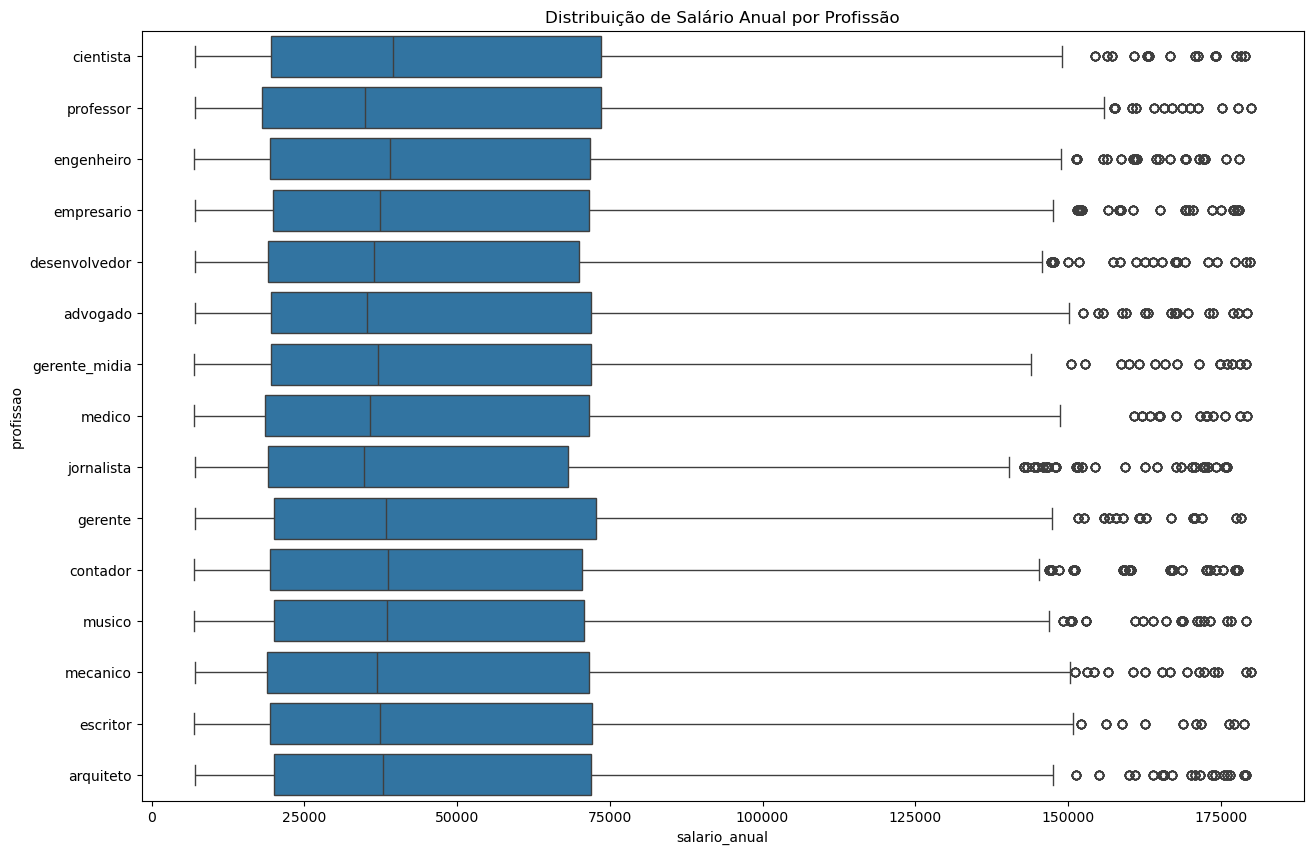

In [151]:
# boxplot do salário anual por profissão
plt.figure(figsize=(15,10))
sns.boxplot(x='salario_anual', y='profissao', data=table)
plt.title('Distribuição de Salário Anual por Profissão')
plt.show()

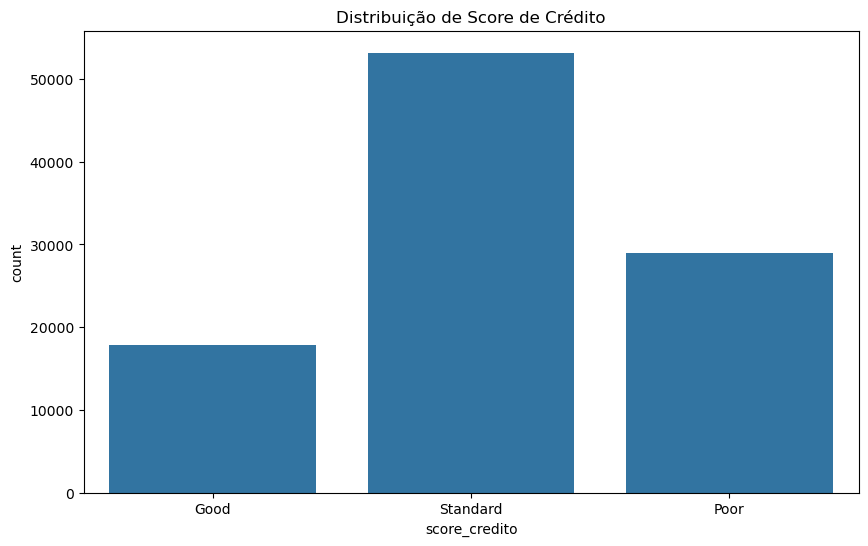

In [152]:
plt.figure(figsize=(10,6))
sns.countplot(data=table, x='score_credito')
plt.title('Distribuição de Score de Crédito')
plt.show()

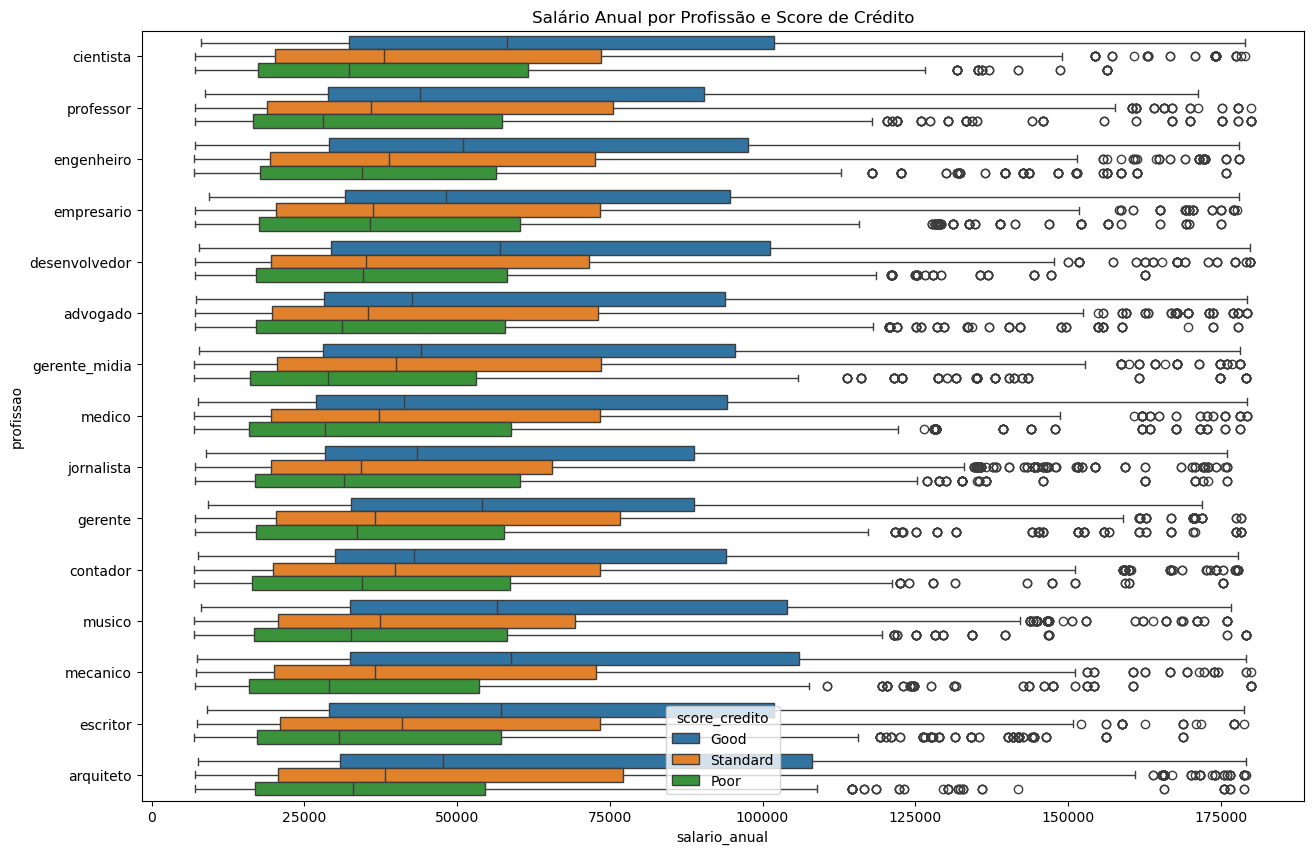

In [153]:
plt.figure(figsize=(15,10))
sns.boxplot(x='salario_anual', y='profissao', hue='score_credito', data=table)
plt.title('Salário Anual por Profissão e Score de Crédito')
plt.show()

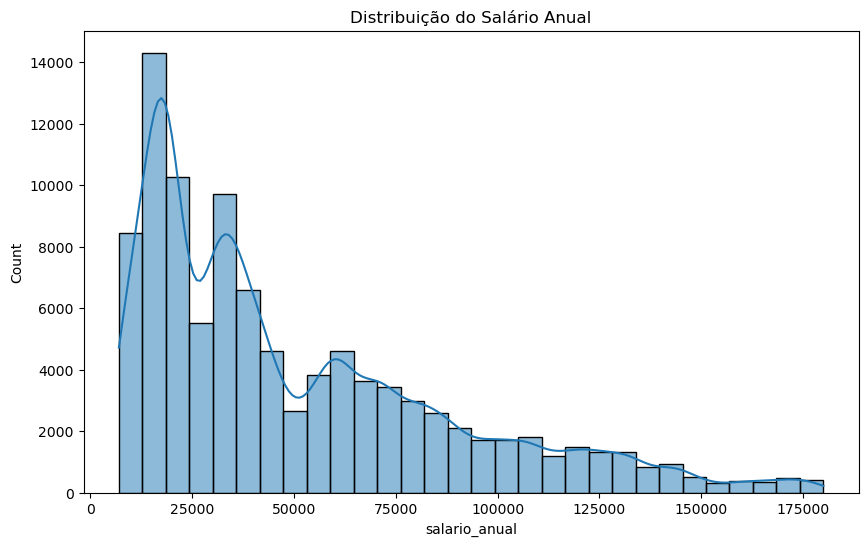

In [154]:
plt.figure(figsize=(10,6))
sns.histplot(data=table, x='salario_anual', bins=30, kde=True)
plt.title('Distribuição do Salário Anual')
plt.show()

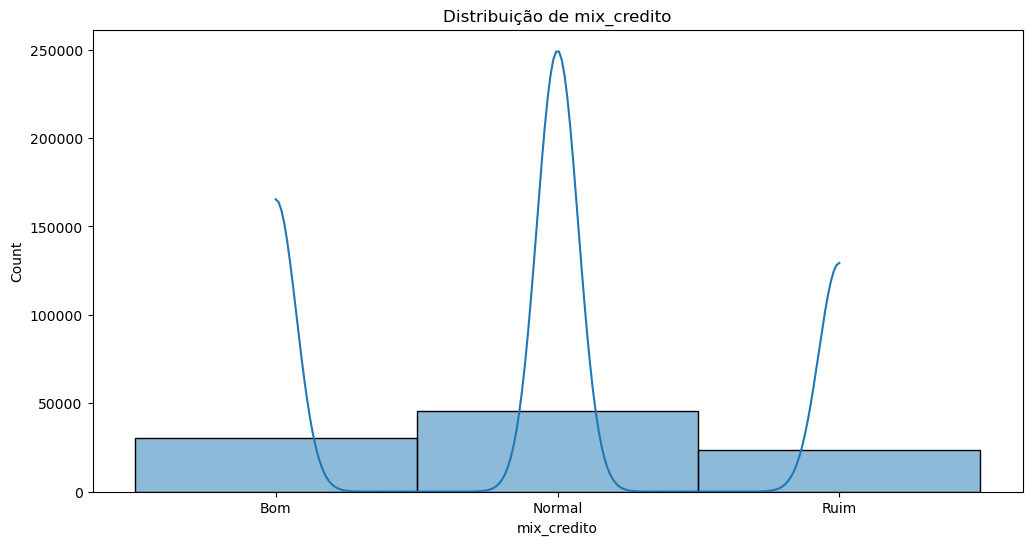

In [155]:
plt.figure(figsize=(12, 6))
sns.histplot(table['mix_credito'], bins = 30, kde=True)
plt.title('Distribuição de mix_credito')
plt.show()

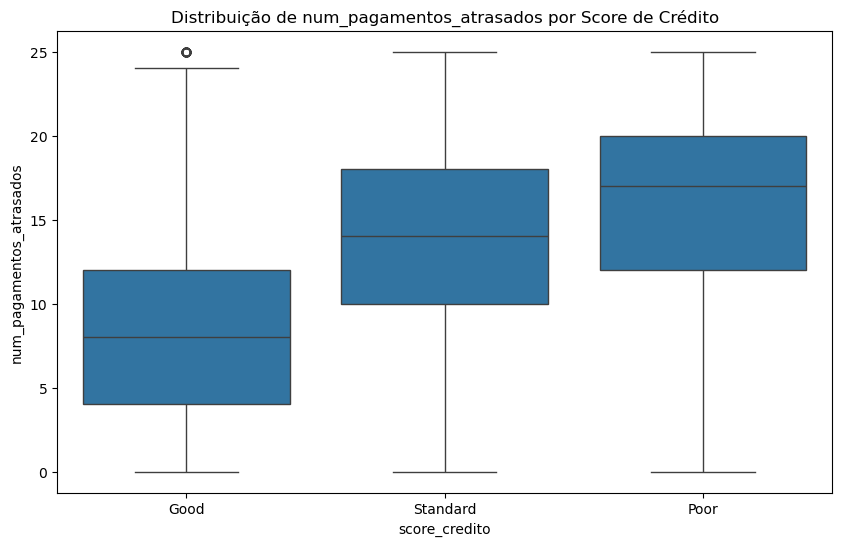

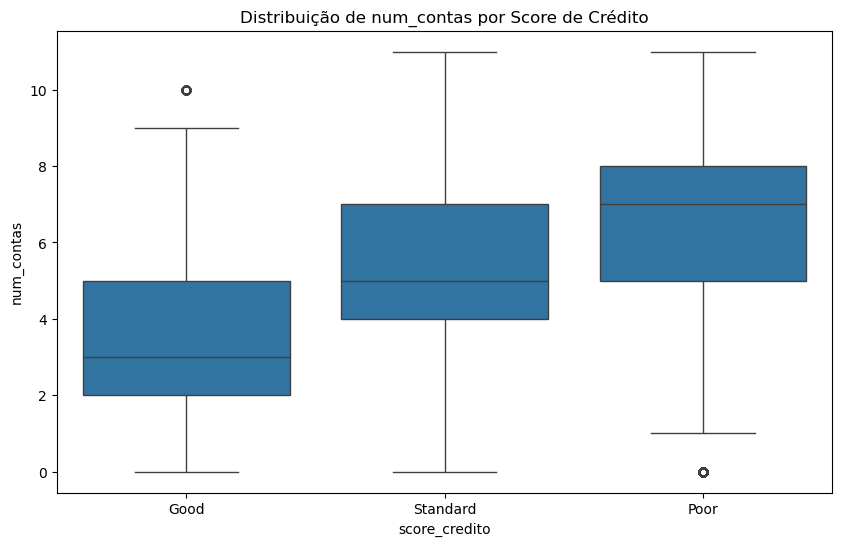

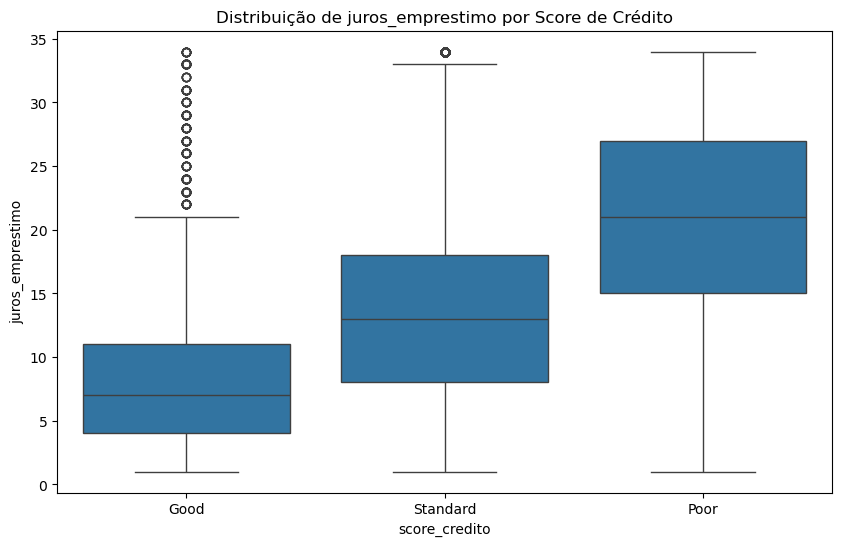

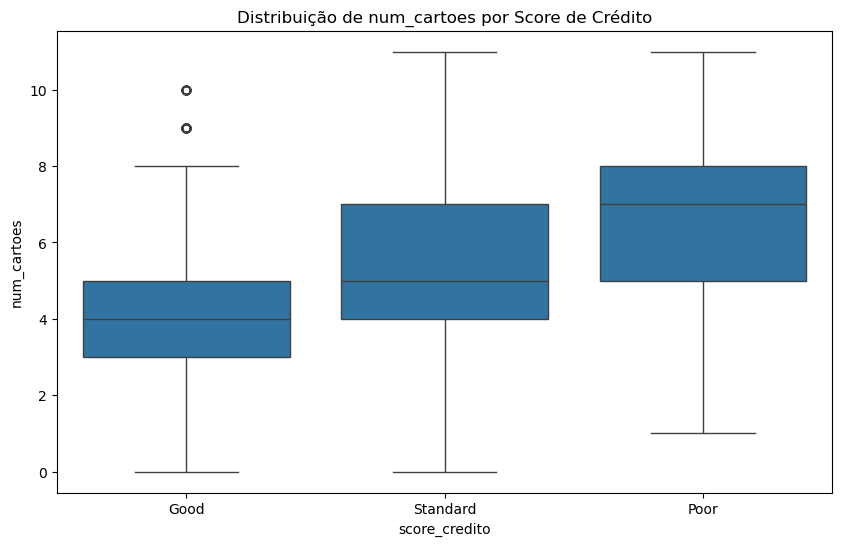

In [156]:
for col in ['num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes']:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='score_credito', y=col, data=table)
    plt.title(f'Distribuição de {col} por Score de Crédito')
    plt.show()

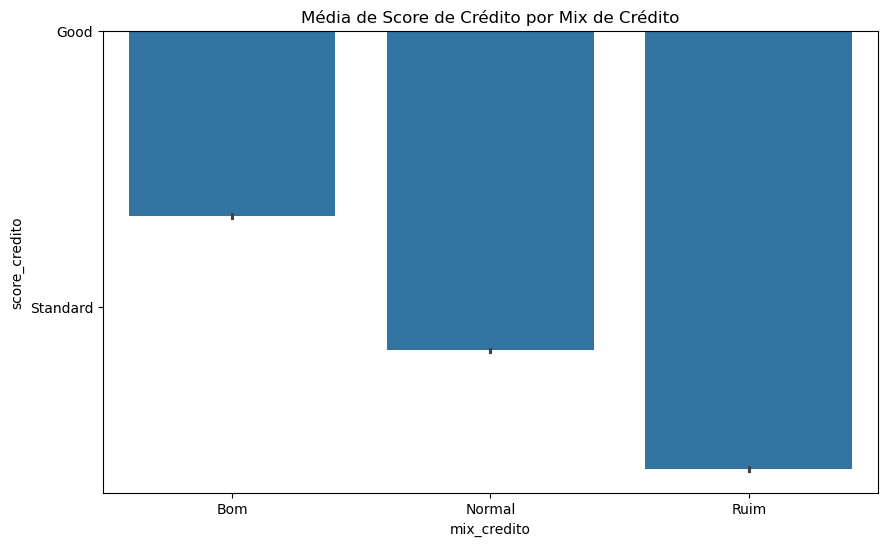

In [157]:
plt.figure(figsize=(10,6))
sns.barplot(x='mix_credito', y='score_credito', data=table, estimator=np.mean)
plt.title('Média de Score de Crédito por Mix de Crédito')
plt.show()

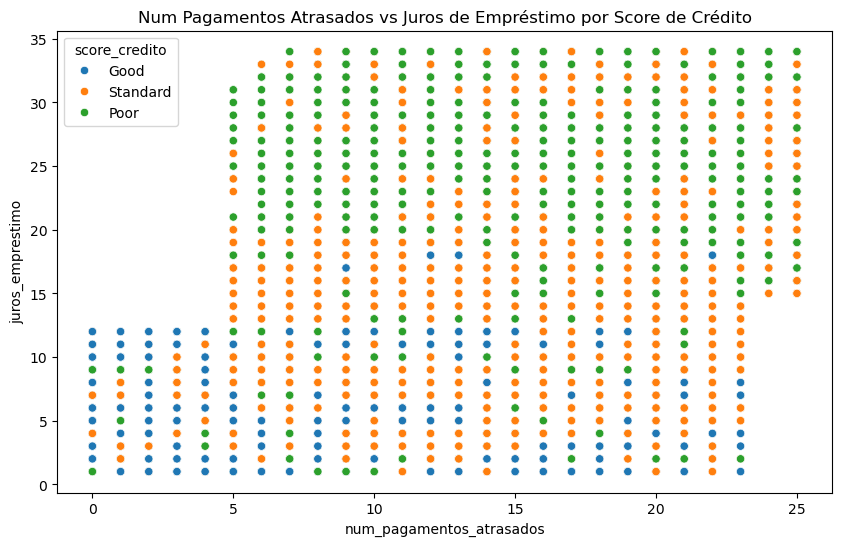

In [158]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_pagamentos_atrasados', y='juros_emprestimo', hue='score_credito', data=table)
plt.title('Num Pagamentos Atrasados vs Juros de Empréstimo por Score de Crédito')
plt.show()

In [159]:
"""ENCODING"""

'ENCODING'

In [160]:
from sklearn.preprocessing import  LabelEncoder
# Transformar variável categórica em numérica
codificator = LabelEncoder()

# Não aplicar na coluna score_credito
for coluna in table.columns:
    if table[coluna].dtype == "object" and coluna != "score_credito":
        table[coluna] = codificator.fit_transform(table[coluna])
                                                  
print(table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id_cliente                100000 non-null  int64  
 1   mes                       100000 non-null  int64  
 2   idade                     100000 non-null  float64
 3   profissao                 100000 non-null  int32  
 4   salario_anual             100000 non-null  float64
 5   num_contas                100000 non-null  float64
 6   num_cartoes               100000 non-null  float64
 7   juros_emprestimo          100000 non-null  float64
 8   num_emprestimos           100000 non-null  float64
 9   dias_atraso               100000 non-null  float64
 10  num_pagamentos_atrasados  100000 non-null  float64
 11  num_verificacoes_credito  100000 non-null  float64
 12  mix_credito               100000 non-null  int32  
 13  divida_total              100000 non-null  fl

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
table['profissao'] = le.fit_transform(table['profissao'])
table['score_credito'] = le.fit_transform(table['score_credito'])
table['mix_credito'] = le.fit_transform(table['mix_credito'])
table['comportamento_pagamento'] = le.fit_transform(table['comportamento_pagamento'])

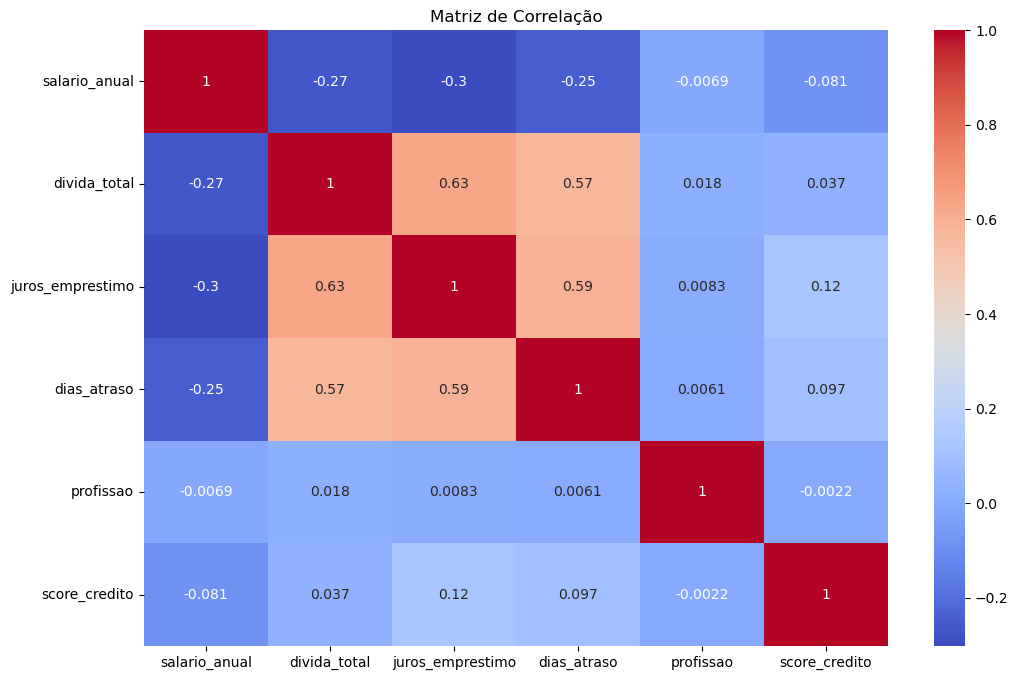

In [162]:
# Matriz de Correlação
plt.figure(figsize=(12,8))
sns.heatmap(table[['salario_anual', 'divida_total', 'juros_emprestimo', 'dias_atraso', 'profissao', 'score_credito']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

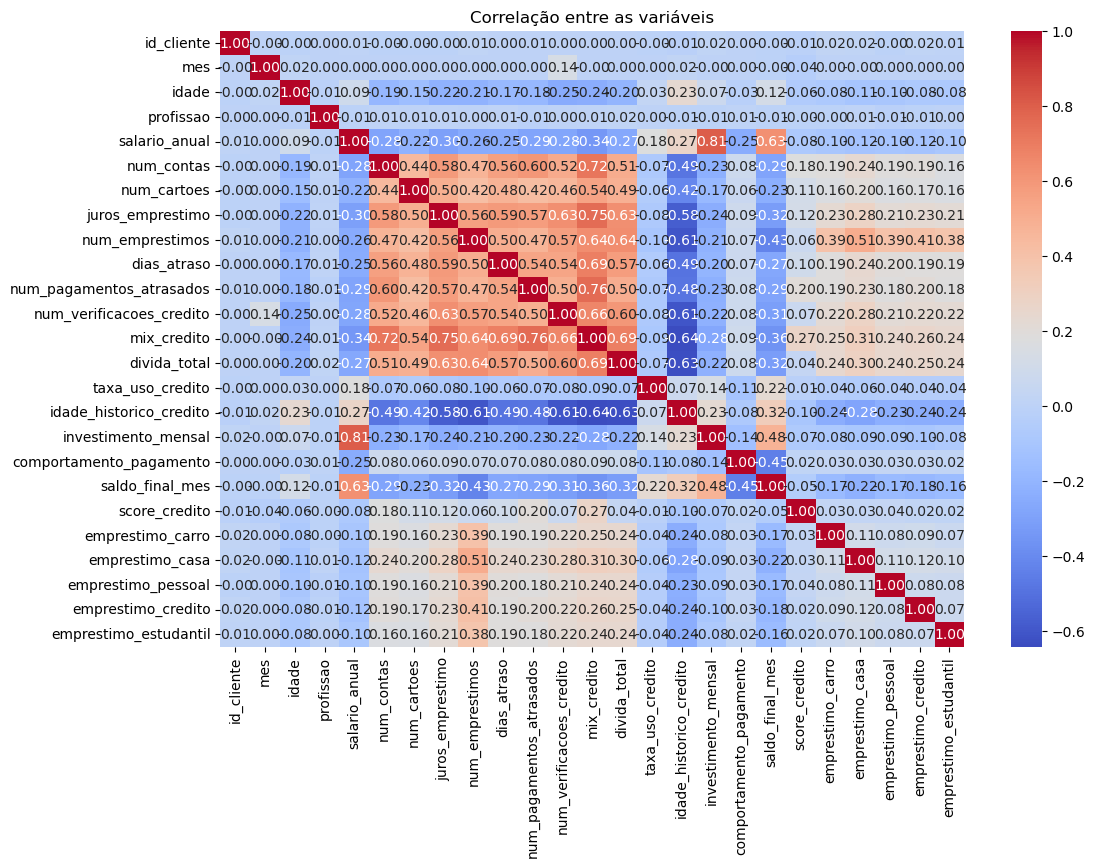

In [163]:
# Mapa de calor das correlações gerais
numeric_cols = table.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre as variáveis')
plt.show()

In [164]:
# Certifique-se de que as colunas categóricas já foram codificadas antes

# Calculando as correlações com o atributo alvo 'score_credito'
correlations = table.drop(columns=['score_credito']).apply(lambda x: x.corr(table['score_credito']))

# Obtendo as top 10 maiores correlações (em valor absoluto)
best_correlations = correlations.abs().nlargest(10)

# Exibindo as melhores correlações
print("Top 10 maiores correlações com 'score_credito':")
print(best_correlations)

# Pegando os nomes das colunas correspondentes
best_correlations_columns = best_correlations.index.tolist()
print("\nNomes das colunas com as maiores correlações:")
print(best_correlations_columns)

Top 10 maiores correlações com 'score_credito':
mix_credito                 0.27
num_pagamentos_atrasados    0.20
num_contas                  0.18
juros_emprestimo            0.12
num_cartoes                 0.11
idade_historico_credito     0.10
dias_atraso                 0.10
salario_anual               0.08
investimento_mensal         0.07
num_verificacoes_credito    0.07
dtype: float64

Nomes das colunas com as maiores correlações:
['mix_credito', 'num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes', 'idade_historico_credito', 'dias_atraso', 'salario_anual', 'investimento_mensal', 'num_verificacoes_credito']


In [165]:
"""
As top 3 maiores correlações com o atributo alvo 'score_credito' são:
1. mix_credito
2. num_pagamentos_atrasados
3. num_contas

Outras 2 correlações significativas são:
juros_emprestimo
num_cartoes
"""

"\nAs top 3 maiores correlações com o atributo alvo 'score_credito' são:\n1. mix_credito\n2. num_pagamentos_atrasados\n3. num_contas\n\nOutras 2 correlações significativas são:\njuros_emprestimo\nnum_cartoes\n"

In [166]:
# Estatísticas descritivas por score_credito
focus_columns = ['mix_credito', 'num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes']
display(table.groupby('score_credito')[focus_columns].mean())
display(table.groupby('score_credito')[focus_columns].describe())

,mix_credito,num_pagamentos_atrasados,num_contas,juros_emprestimo,num_cartoes
score_credito,,,,,
0,0.19,8.56,3.44,7.66,4.14
1,1.33,15.81,6.53,20.19,6.63
2,0.97,13.54,5.38,13.75,5.40


mix_credito                                       \
                    count  mean   std  min  25%  50%  75%  max   
score_credito                                                    
0                 17828.0  0.19  0.44  0.0  0.0  0.0  0.0  2.0   
1                 28998.0  1.33  0.74  0.0  1.0  1.0  2.0  2.0   
2                 53174.0  0.97  0.61  0.0  1.0  1.0  1.0  2.0   

              num_pagamentos_atrasados         ... juros_emprestimo        \
                                 count   mean  ...              75%   max   
score_credito                                  ...                          
0                              17828.0   8.56  ...             11.0  34.0   
1                              28998.0  15.81  ...             27.0  34.0   
2                              53174.0  13.54  ...             18.0  34.0   

              num_cartoes                                        
                    count  mean   std  min  25%  50%  75%   max  
score_credito                                                    
0                 17828.0  4.14  1.81  0.0  3.0  4.0  5.0  10.0  
1                 28998.0  6.63  1.99  1.0  5.0  7.0  8.0  11.0  
2                 53174.0  5.40  1.86  0.0  4.0  5.0  7.0  11.0  

[3 rows x 40 columns]

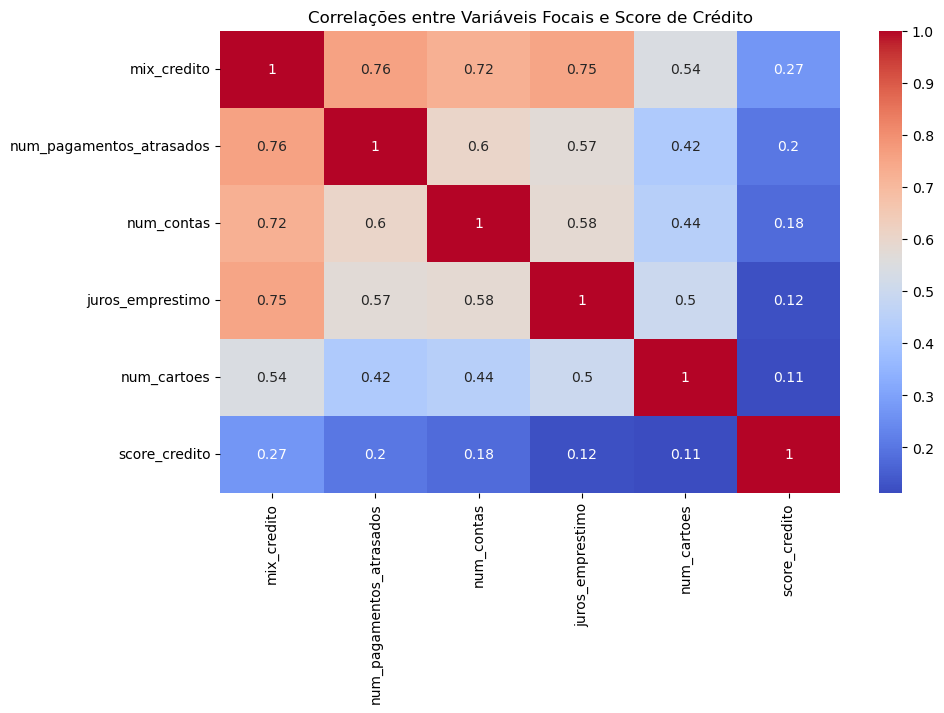

In [167]:
# Confirmando as principais correlações
plt.figure(figsize=(10,6))
sns.heatmap(table[focus_columns + ['score_credito']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlações entre Variáveis Focais e Score de Crédito')
plt.show()

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Selecionar as colunas
X = table[['mix_credito', 'num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes']]
y = table['score_credito']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Avaliar
print(f"Acurácia com as top 5 variáveis: {accuracy_score(y_test, y_pred):.2f}")

Acurácia com as top 5 variáveis: 0.72


                    Feature  Importance
3          juros_emprestimo        0.31
1  num_pagamentos_atrasados        0.23
0               mix_credito        0.19
4               num_cartoes        0.15
2                num_contas        0.13


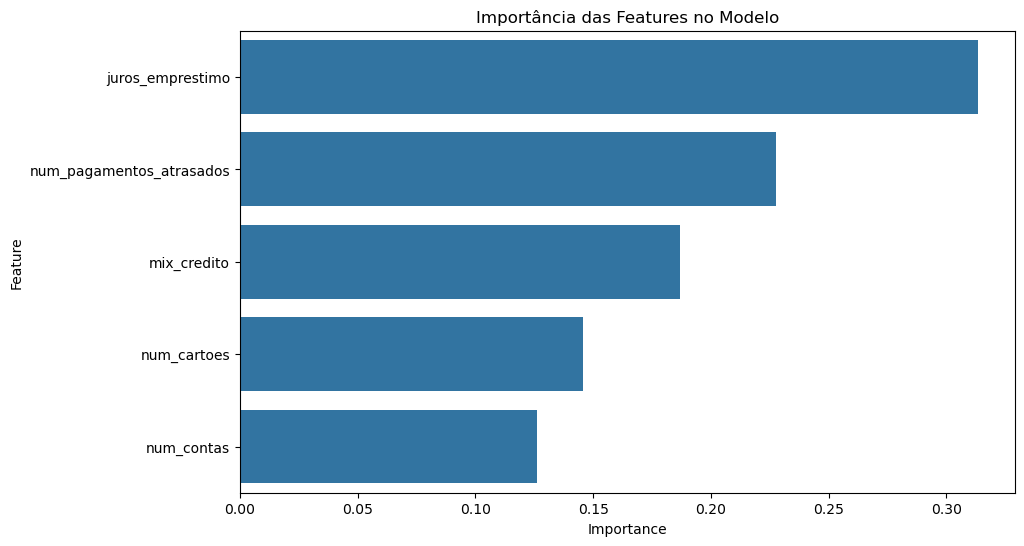

In [169]:
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False)
print(feature_importance_df)

# Gráfico de importância
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features no Modelo')
plt.show()

In [170]:

""" 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Variáveis focais
focus_columns = ['mix_credito', 'num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes']

# Selecionar features e alvo
X = table[focus_columns]
y = table['score_credito']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Usando 5 vizinhos como padrão
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

# Calcular e exibir a acurácia
print(f"Acurácia com as top 5 variáveis (KNN): {accuracy_score(y_test, y_pred):.2f}")
 """


' \nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\n# Variáveis focais\nfocus_columns = [\'mix_credito\', \'num_pagamentos_atrasados\', \'num_contas\', \'juros_emprestimo\', \'num_cartoes\']\n\n# Selecionar features e alvo\nX = table[focus_columns]\ny = table[\'score_credito\']\n\n# Dividir os dados em treino e teste\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\n# Criar e treinar o modelo KNN\nknn = KNeighborsClassifier(n_neighbors=5)  # Usando 5 vizinhos como padrão\nknn.fit(X_train, y_train)\n\n# Fazer previsões\ny_pred = knn.predict(X_test)\n\n# Calcular e exibir a acurácia\nprint(f"Acurácia com as top 5 variáveis (KNN): {accuracy_score(y_test, y_pred):.2f}")\n '

Acurácia com as top 5 variáveis (KNN): 0.70
                    Feature  Importance
3          juros_emprestimo        0.22
4               num_cartoes        0.11
1  num_pagamentos_atrasados        0.11
2                num_contas        0.10
0               mix_credito        0.04


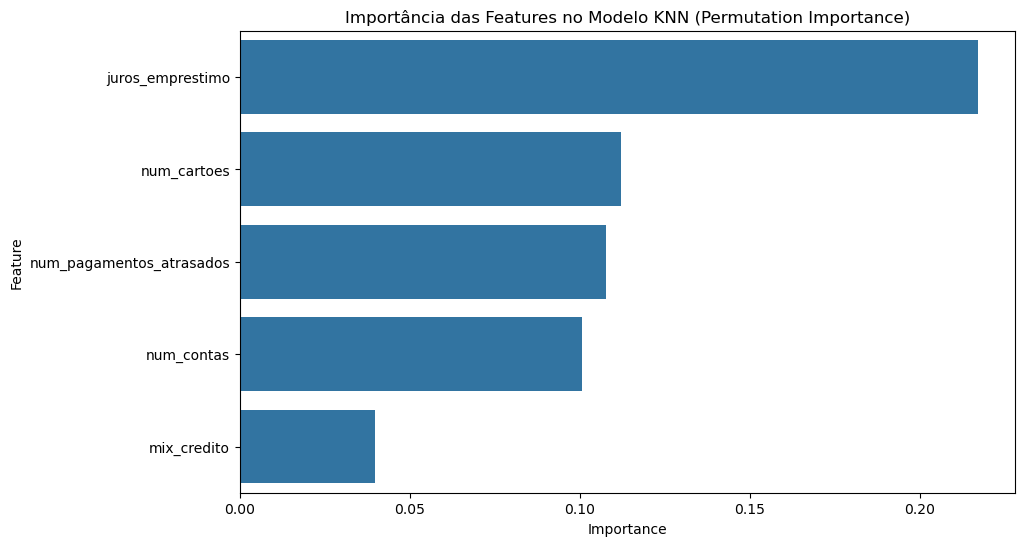

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Variáveis focais
focus_columns = ['mix_credito', 'num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes']

# Selecionar features e alvo
X = table[focus_columns]
y = table['score_credito']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Fazer previsões e verificar acurácia
y_pred = knn.predict(X_test)
print(f"Acurácia com as top 5 variáveis (KNN): {accuracy_score(y_test, y_pred):.2f}")

# Calcular a importância das features por permutação
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Criar DataFrame com as importâncias
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

# Exibir as importâncias
print(feature_importance_df)

# Gráfico de importância
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features no Modelo KNN (Permutation Importance)')
plt.show()

In [172]:
segmentacao = table.groupby('score_credito')[focus_columns].mean()
display(segmentacao)
"""
0 é Bom
1 é Normal
2 é Ruim
"""

,mix_credito,num_pagamentos_atrasados,num_contas,juros_emprestimo,num_cartoes
score_credito,,,,,
0,0.19,8.56,3.44,7.66,4.14
1,1.33,15.81,6.53,20.19,6.63
2,0.97,13.54,5.38,13.75,5.40


'\n0 é Bom\n1 é Normal\n2 é Ruim\n'

In [173]:
display(table)
# Note que apenas a coluna score_credito não foi alterada, pois é a coluna que desejamos descobrir mais sobre


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,...,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,265.0,21.47,1,312.49,0,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,266.0,21.47,3,284.63,0,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,...,267.0,21.47,5,331.21,0,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,...,268.0,21.47,4,223.45,0,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,...,269.0,21.47,2,341.49,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,37932,4,25.0,11,39628.99,4.0,6.0,7.0,2.0,23.0,...,378.0,24.03,0,479.87,1,1,0,0,0,1
99996,37932,5,25.0,11,39628.99,4.0,6.0,7.0,2.0,18.0,...,379.0,24.03,2,496.65,1,1,0,0,0,1
99997,37932,6,25.0,11,39628.99,4.0,6.0,7.0,2.0,27.0,...,380.0,24.03,0,516.81,1,1,0,0,0,1
99998,37932,7,25.0,11,39628.99,4.0,6.0,7.0,2.0,20.0,...,381.0,24.03,3,319.16,2,1,0,0,0,1


In [174]:
"""
As top 3 maiores correlações com o atributo alvo 'score_credito' são:
1. mix_credito
2. num_pagamentos_atrasados
3. num_contas

Outras 2 correlações significativas são:
juros_emprestimo
num_cartoes
"""

"\nAs top 3 maiores correlações com o atributo alvo 'score_credito' são:\n1. mix_credito\n2. num_pagamentos_atrasados\n3. num_contas\n\nOutras 2 correlações significativas são:\njuros_emprestimo\nnum_cartoes\n"

In [175]:
table_original = pd.read_csv("data\\clientes.csv")

# Ver os valores únicos de mix_credito antes do encoding
valores_originais = table_original['mix_credito'].unique()
print("Valores originais de mix_credito:", valores_originais)

Valores originais de mix_credito: ['Bom' 'Normal' 'Ruim']


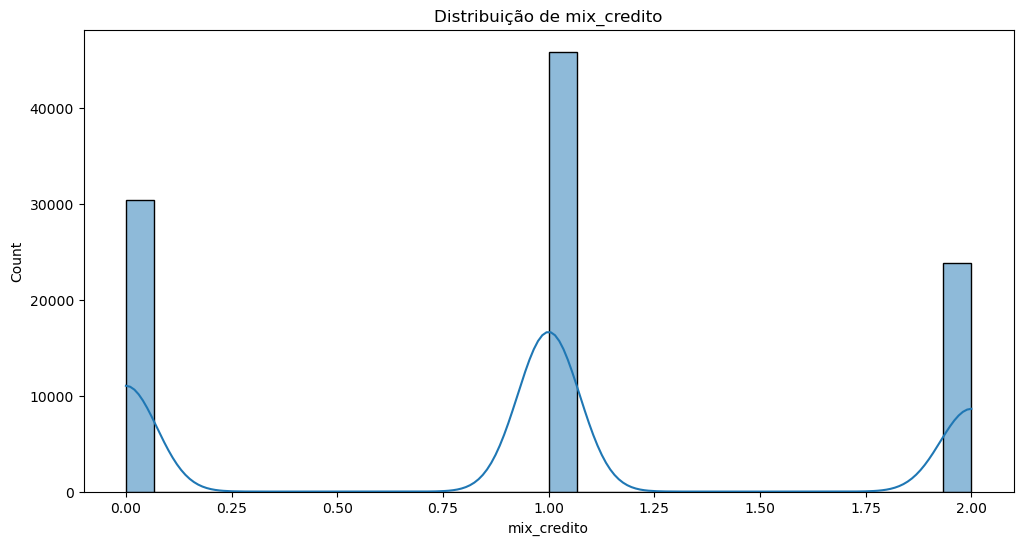

In [176]:
plt.figure(figsize=(12, 6))
sns.histplot(table['mix_credito'], bins = 30, kde=True)
plt.title('Distribuição de mix_credito')
plt.show()

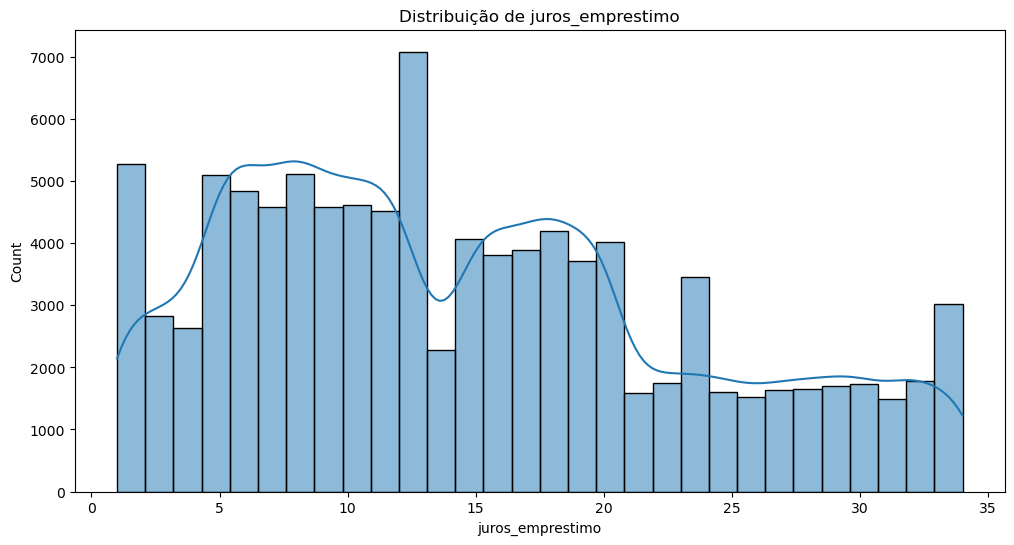

In [177]:
plt.figure(figsize=(12, 6))
sns.histplot(table['juros_emprestimo'], bins = 30, kde=True)
plt.title('Distribuição de juros_emprestimo')
plt.show()

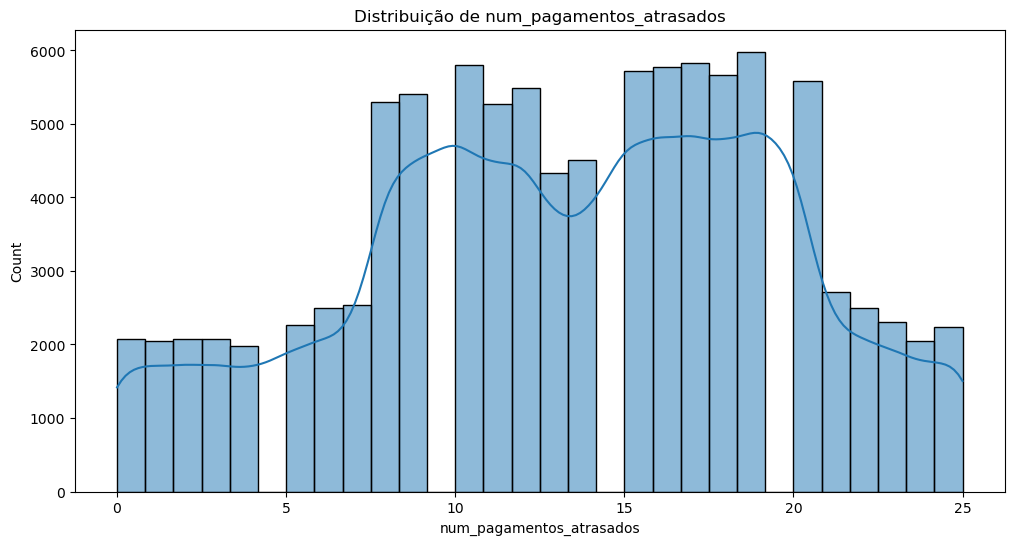

In [178]:

plt.figure(figsize=(12, 6))
sns.histplot(table['num_pagamentos_atrasados'], bins = 30, kde=True)
plt.title('Distribuição de num_pagamentos_atrasados')
plt.show()

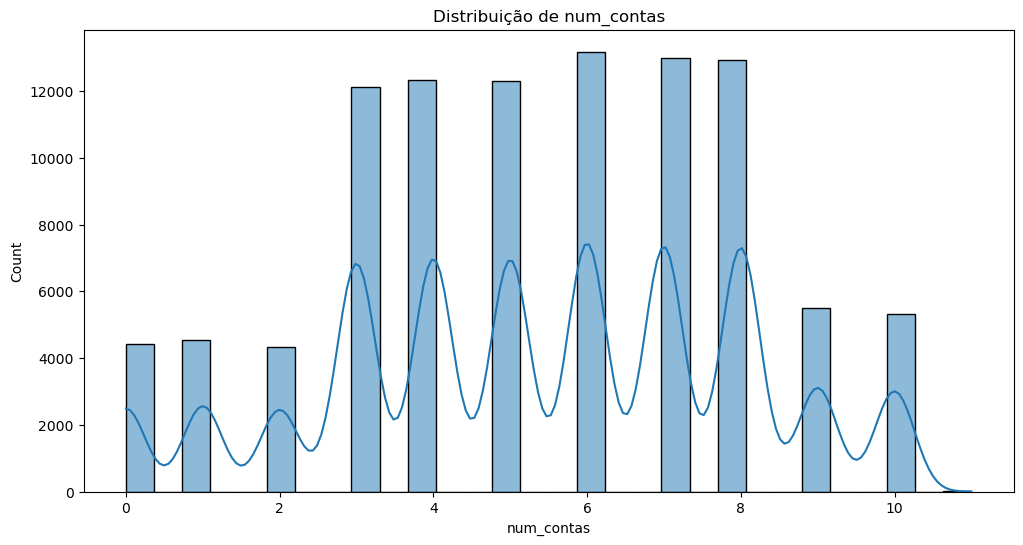

In [179]:
"""
As top 3 maiores correlações com o atributo alvo 'score_credito' são:
1. mix_credito
2. num_pagamentos_atrasados
3. num_contas

Outras 2 correlações significativas são:
juros_emprestimo
num_cartoes
"""
plt.figure(figsize=(12, 6))
sns.histplot(table['num_contas'], bins = 30, kde=True)
plt.title('Distribuição de num_contas')
plt.show()


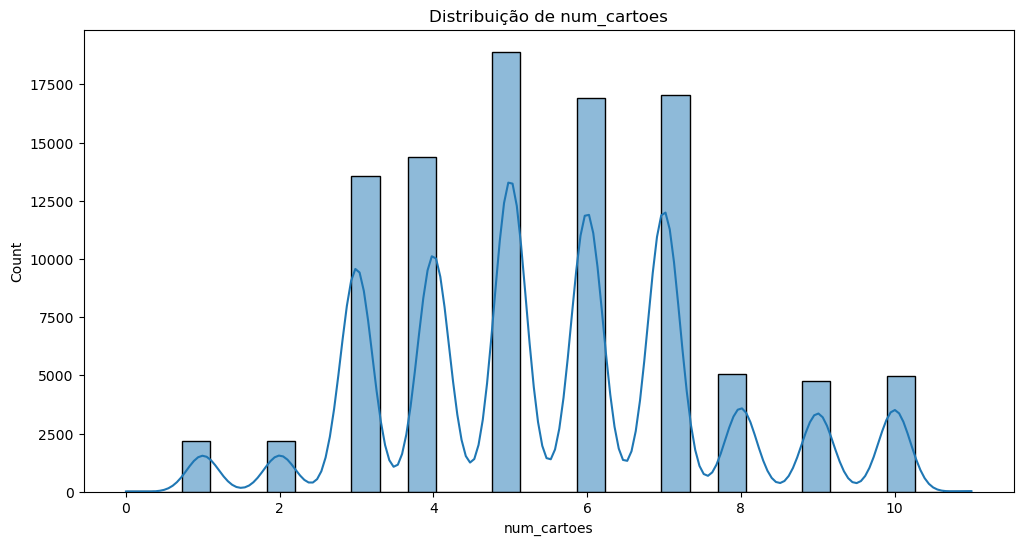

In [180]:
plt.figure(figsize=(12, 6))
sns.histplot(table['num_cartoes'], bins = 30, kde=True)
plt.title('Distribuição de num_cartoes')
plt.show()


In [181]:
"""Algumas outras distribuições que podem ser interessantes analisar"""

'Algumas outras distribuições que podem ser interessantes analisar'

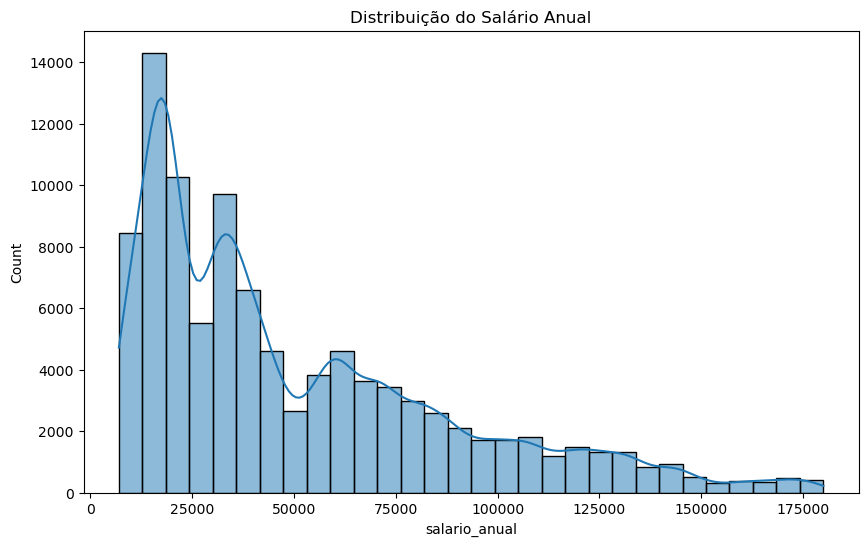

In [182]:
plt.figure(figsize=(10,6))
sns.histplot(data=table, x='salario_anual', bins=30, kde=True)
plt.title('Distribuição do Salário Anual')
plt.show()

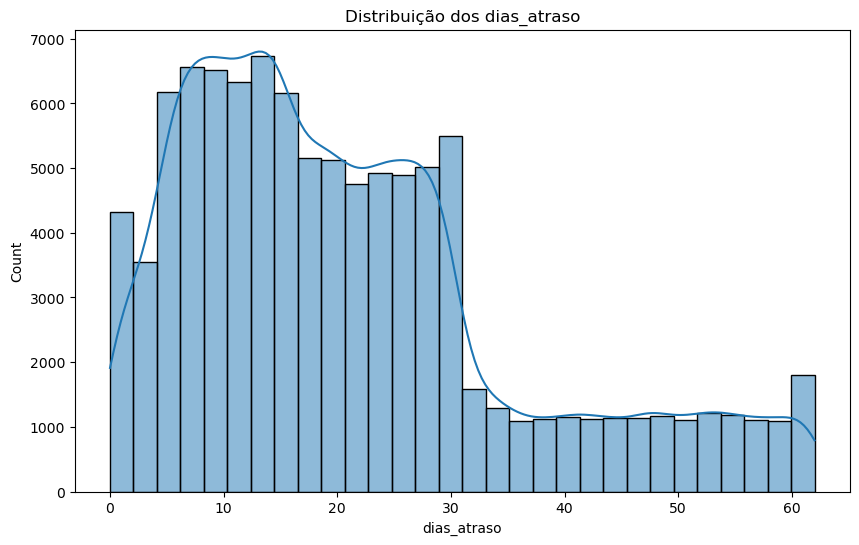

In [183]:
plt.figure(figsize=(10,6))
sns.histplot(data=table, x='dias_atraso', bins=30, kde=True)
plt.title('Distribuição dos dias_atraso')
plt.show()

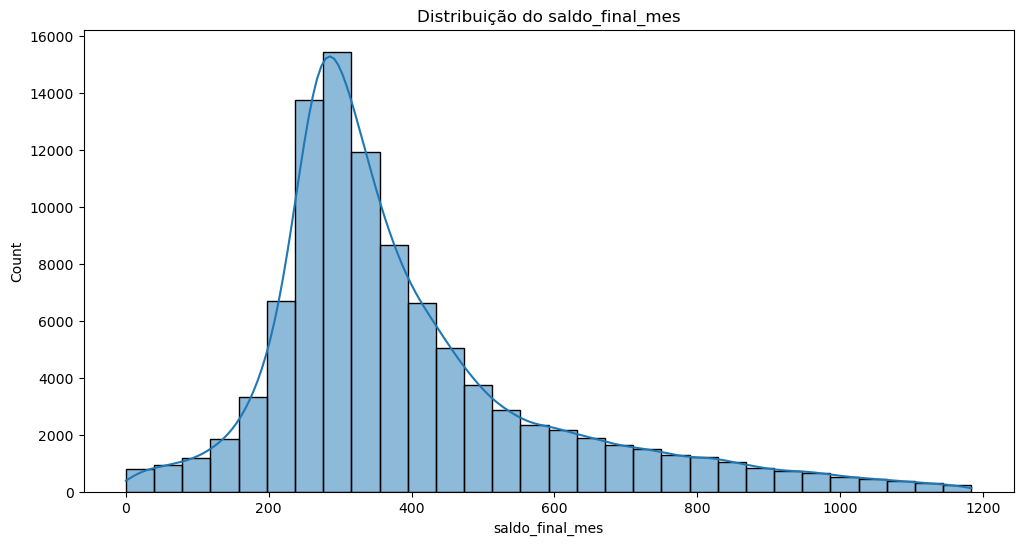

In [184]:
plt.figure(figsize=(12, 6))
sns.histplot(table['saldo_final_mes'], bins = 30, kde=True)
plt.title('Distribuição do saldo_final_mes')
plt.show()

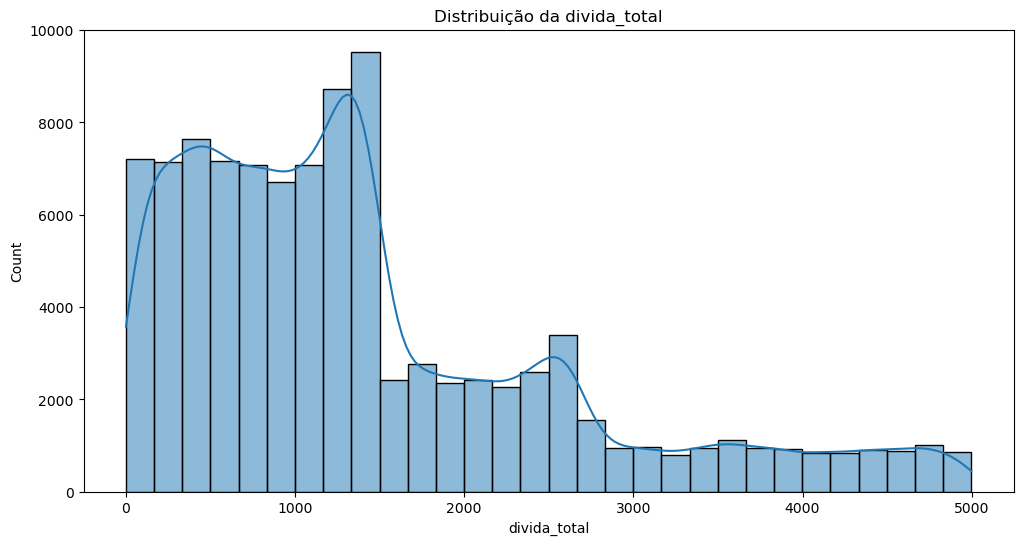

In [185]:
plt.figure(figsize=(12, 6))
sns.histplot(table['divida_total'], bins=30, kde=True)
plt.title('Distribuição da divida_total')
plt.show()

In [186]:
"""Explorando as 5 características mais importantes com describe()"""
table[['mix_credito', 'num_pagamentos_atrasados', 'num_contas', 'juros_emprestimo', 'num_cartoes']].describe()


,mix_credito,num_pagamentos_atrasados,num_contas,juros_emprestimo,num_cartoes
count,100000.00,100000.00,100000.00,100000.00,100000.00
mean,0.93,13.31,5.37,14.53,5.53
std,0.73,6.24,2.59,8.74,2.07
min,0.00,0.00,0.00,1.00,0.00
25%,0.00,9.00,3.00,7.00,4.00
50%,1.00,14.00,5.00,13.00,5.00
75%,1.00,18.00,7.00,20.00,7.00
max,2.00,25.00,11.00,34.00,11.00


### 5 Atributos Mais Correlacionados com Score de Crédito

**mix_credito:** <br>
- média = 0.93  
- max = 2.00  
- min = 0.00  

**num_pagamentos_atrasados:** <br>
- média = 13.31  
- max = 25.00  
- min = 0.00  

**num_contas:** <br>
- média = 5.37  
- max = 11.00  
- min = 0.00  

**juros_emprestimo:** <br>
- média = 14.53  
- max = 34.00  
- min = 1.00  

**num_cartoes:** <br>
- média = 5.53  
- max = 11.00  
- min = 0.00  


In [188]:
"""Prevendo o Score de Crédito dos novos clientes"""

novos_clientes = pd.read_csv('data\\novos_clientes.csv')
# display(novos_clientes)

novos_clientes['mix_credito'] = le.fit_transform(novos_clientes['mix_credito'])

X_novos = novos_clientes[focus_columns]

# Fazer previsões
rf_pred = rf.predict(X_novos)
knn_pred = knn.predict(X_novos)

score_map = {0: 'Good', 1: 'Poor', 2: 'Standard'}
rf_pred_labels = [score_map[pred] for pred in rf_pred]
knn_pred_labels = [score_map[pred] for pred in knn_pred]

# Exibir resultados
resultados = pd.DataFrame({
    'Mix Credito': novos_clientes['mix_credito'],
    'Num Pagamentos Atrasados': novos_clientes['num_pagamentos_atrasados'],
    'Num Contas': novos_clientes['num_contas'],
    'Juros Emprestimo': novos_clientes['juros_emprestimo'],
    'Num Cartoes': novos_clientes['num_cartoes'],
    'Score Credito (Random Forest)': rf_pred_labels,
    'Score Credito (KNN)': knn_pred_labels
})
print("\nPrevisões para os novos clientes:")
display(resultados)


Previsões para os novos clientes:


,Mix Credito,Num Pagamentos Atrasados,Num Contas,Juros Emprestimo,Num Cartoes,Score Credito (Random Forest),Score Credito (KNN)
0,1,19.0,6.0,17.0,7.0,Poor,Poor
1,0,18.0,5.0,10.0,5.0,Good,Standard
2,0,14.0,8.0,14.0,6.0,Good,Standard


### Análise dos Novos Clientes

| Cliente | Mix Credito | Pag. Atrasados | Contas | Juros | Cartões | RF Prediction | KNN Prediction |
|---------|-------------|----------------|--------|-------|---------|---------------|----------------|
| 0       | Normal      | 19.0           | 6.0    | 17.0  | 7.0     | Poor          | Poor           |
| 1       | Bom         | 18.0           | 5.0    | 10.0  | 5.0     | Good          | Standard       |
| 2       | Bom         | 14.0           | 8.0    | 14.0  | 6.0     | Good          | Standard       |

#### Resumo
- **Cliente 0 (Empresário - 31 anos)**: Alto número de pagamentos atrasados (19) e juros elevados (17) indicam risco significativo. Ambos os modelos (RF e KNN) preveem **"Poor"**, sugerindo baixa qualidade de crédito.<br><br>
- **Cliente 1 (Advogado - 32 anos)**: Apesar de 18 atrasos, o `mix_credito` "Bom" e juros moderados (10) levam o Random Forest a prever **"Good"**, enquanto o KNN, mais cauteloso, sugere **"Standard"**. Perfil intermediário.<br><br>
- **Cliente 2 (Empresário - 48 anos)**: Com 14 atrasos, `mix_credito` "Bom" e juros médios (14), o RF prevê **"Good"**, mas o KNN opta por **"Standard"**. Risco moderado, mas com potencial positivo.

#### Conclusão
O Random Forest (acurácia 0.72) é mais otimista, classificando dois clientes como "Good", enquanto o KNN (acurácia 0.70) é conservador, preferindo "Standard". Recomendo confiar no RF ("Poor", "Good", "Good") pela maior precisão, mas o Cliente 1 e 2 podem merecer avaliação adicional devido à divergência.
